<a href="https://colab.research.google.com/github/arfild/dw_matrix_road_sign/blob/master/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import os
import datetime

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
cd'/content/drive/My Drive/Colab Notebook/matrix/matrix_tree/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebook/matrix/matrix_tree/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test  = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test,  y_test  = test['features'],  test['labels']

In [6]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [7]:
len(np.unique(y_train))


43

In [8]:
if y_train.ndim == 1: y_train = to_categorical(y_train) 
y_train.shape
if y_test.ndim == 1: y_test = to_categorical(y_test)
y_test.shape

(4410, 43)

In [9]:
input_shape = X_train.shape[1:] #pobieramy wymiar warttwy mamy (32px x 32px x 3 warstwy)
num_classes = y_train.shape[1]  # pobieramy ilość klas

input_shape, num_classes

((32, 32, 3), 43)

In [12]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  Flatten(),
  Dense(num_classes, activation='softmax')

])

#model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam' , metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 4ms/step - loss: 11.6486 - accuracy: 0.7541


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  
  Flatten(),
  
  Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='Adam', 
    metrics=['accuracy']
  )


  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128), 
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback],
      )
  return model


#get_cnn_v1(input_shape, num_classes).summary()

In [19]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 28.6178 - accuracy: 0.7055 - val_loss: 0.2293 - val_accuracy: 0.9395
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2046 - accuracy: 0.9520 - val_loss: 0.1315 - val_accuracy: 0.9678
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1315 - accuracy: 0.9688 - val_loss: 0.0993 - val_accuracy: 0.9778
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1074 - accuracy: 0.9747 - val_loss: 0.0963 - val_accuracy: 0.9754
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0774 - accuracy: 0.9818 - val_loss: 0.0760 - val_accuracy: 0.9832


In [20]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[1.09878465e-05, 3.58095393e-04, 2.13575826e-04, ...,
        3.86769926e-07, 7.99284899e-05, 3.69453744e-04],
       [5.19847902e-07, 1.59685093e-04, 1.32146827e-03, ...,
        2.39133788e-05, 1.09781195e-05, 3.36855010e-04],
       [6.74387820e-06, 1.63456541e-04, 7.22225159e-05, ...,
        6.00208580e-07, 6.81685196e-05, 3.20995081e-04],
       ...,
       [8.80194362e-03, 6.12343382e-03, 5.68935322e-03, ...,
        2.96368962e-03, 3.64085101e-03, 3.63860489e-03],
       [1.20393774e-02, 6.95206597e-03, 4.04651556e-03, ...,
        8.20568949e-03, 5.16357692e-03, 1.17641664e-03],
       [1.37573027e-03, 2.92246230e-03, 2.26065121e-03, ...,
        6.53232855e-04, 1.86384970e-03, 4.59558709e-04]], dtype=float32)

In [27]:
y_pred_prob[400]

array([8.50441720e-05, 9.99510407e-01, 1.44962327e-08, 9.04158345e-11,
       4.04443010e-04, 4.96697048e-08, 2.86480090e-10, 1.15816160e-15,
       6.02229424e-18, 6.04571904e-09, 8.85037960e-15, 6.50811610e-21,
       6.97017281e-25, 2.58105111e-08, 7.44956113e-21, 3.23151496e-19,
       3.57550138e-19, 2.77709913e-37, 1.97348406e-15, 1.32864520e-29,
       3.11983002e-21, 6.65323217e-21, 1.07104383e-28, 1.75295069e-23,
       9.91334026e-18, 5.36328761e-19, 1.42948560e-13, 8.64792092e-33,
       4.33551617e-16, 7.98580714e-15, 1.81524791e-27, 1.29541166e-17,
       4.35822280e-21, 2.09526772e-27, 3.98679047e-30, 5.36424017e-15,
       5.71936172e-22, 8.79204755e-34, 1.15898445e-21, 3.74093672e-27,
       1.21488346e-21, 2.53280187e-25, 4.88928384e-23], dtype=float32)

In [37]:
np.sum([8.50441720e-05, 9.99510407e-01, 1.44962327e-08, 9.04158345e-11,
       4.04443010e-04, 4.96697048e-08, 2.86480090e-10, 1.15816160e-15,
       6.02229424e-18, 6.04571904e-09, 8.85037960e-15, 6.50811610e-21,
       6.97017281e-25, 2.58105111e-08, 7.44956113e-21, 3.23151496e-19,
       3.57550138e-19, 2.77709913e-37, 1.97348406e-15, 1.32864520e-29,
       3.11983002e-21, 6.65323217e-21, 1.07104383e-28, 1.75295069e-23,
       9.91334026e-18, 5.36328761e-19, 1.42948560e-13, 8.64792092e-33,
       4.33551617e-16, 7.98580714e-15, 1.81524791e-27, 1.29541166e-17,
       4.35822280e-21, 2.09526772e-27, 3.98679047e-30, 5.36424017e-15,
       5.71936172e-22, 8.79204755e-34, 1.15898445e-21, 3.74093672e-27,
       1.21488346e-21, 2.53280187e-25, 4.88928384e-23])

0.9999999905812323

<BarContainer object of 43 artists>

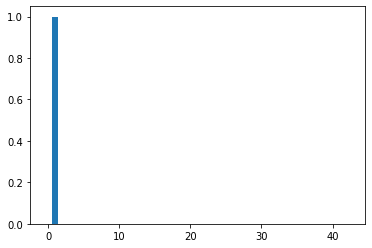

In [39]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [36]:
labels_dict[np.argmax(y_pred_prob[400] )]

'Speed limit (30km/h)'

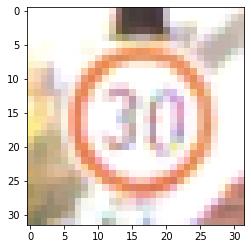

In [26]:
plt.imshow(X_test[400])

In [28]:
ls data

signnames.csv  test.p  train.p
